# Data Loading
Load the MNIST dataset using Keras.

In [1]:
# import Necessary Libraries
from tensorflow.keras.datasets import mnist
from keras import Sequential#sequential is for generic model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical #used to categorize the values into numbers to get the output
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Display dataset shapes
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [3]:
y_train[0]
np.uint8(5)

np.uint8(5)

In [4]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

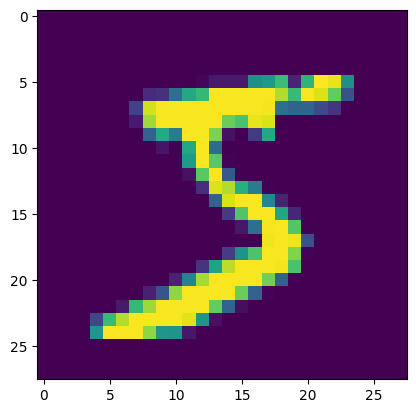

In [5]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()

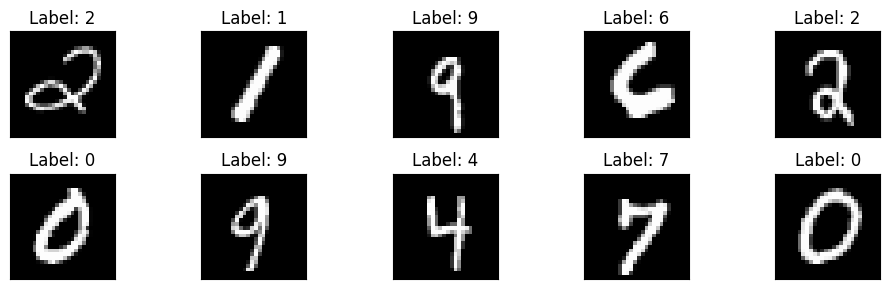

In [6]:
plt.figure(figsize=(10,3))
wind = 1
for i in np.random.randint(0, 60000, 10):

  plt.subplot(2, 5, wind)

  plt.imshow(x_train[i], cmap='gray')

  plt.title(f"Label: {y_train[i]}")

  plt.xticks([])

  plt.yticks([])

  wind += 1

plt.tight_layout()

plt.show()

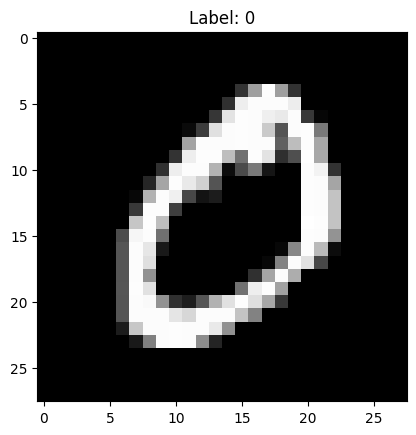

In [7]:
# Basic data visualisation
img = x_train[1,:,:]
label = y_train[1]
plt.imshow(img, cmap="gray")
plt.title(f"Label: {label}")
plt.show()

# Data Preprocessing
Normalize the data and reshape it for CNN input.

In [8]:
np.max(x_train[0])
np.uint8(255)

np.uint8(255)

In [9]:
x_train.shape

(60000, 28, 28)

In [10]:
np.max(x_train.reshape(-1, 28, 28, 2).astype('float16')/255)

np.float16(1.0)

In [11]:
np.mean(x_train.reshape(-1, 28, 28, 2).astype('float16')/255)

np.float16(0.1306)

In [12]:
x_train.reshape(-1, 28, 28, 2).astype('float16')

array([[[[  0.,   0.],
         [  0.,   0.],
         [  0.,   0.],
         ...,
         [  0.,   0.],
         [  0.,   0.],
         [  0.,   0.]],

        [[  0.,   0.],
         [  0.,   0.],
         [  0.,   0.],
         ...,
         [  0.,   0.],
         [  0.,   0.],
         [  0.,   0.]],

        [[  0.,   0.],
         [  0.,   0.],
         [  0.,   0.],
         ...,
         [247., 127.],
         [  0.,   0.],
         [  0.,   0.]],

        ...,

        [[  0.,   0.],
         [  0.,   0.],
         [  0.,   0.],
         ...,
         [  0.,   0.],
         [  0.,   0.],
         [  0.,   0.]],

        [[  0.,   0.],
         [  0.,   0.],
         [  0.,   0.],
         ...,
         [  0.,   0.],
         [  0.,   0.],
         [  0.,   0.]],

        [[  0.,   0.],
         [  0.,   0.],
         [  0.,   0.],
         ...,
         [  0.,   0.],
         [  0.,   0.],
         [  0.,   0.]]],


       [[[  0.,   0.],
         [  0.,   0.],
         [  0.

In [13]:
from keras.utils import to_categorical

# Normalize and reshape
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255

# One-hot encode labels
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [14]:
from tensorflow.keras.datasets import mnist
# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [15]:
int(y_train[3])


1

In [16]:
y_train_cat[3]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

# Model Building
Build a CNN model using Keras Sequential API.

In [17]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 228,202 (891.41 KB)

 Trainable params: 228,202 (891.41 KB)

 Non-trainable params: 0 (0.00 B)

# Model Compilation
Compile the model with Adam optimizer and categorical crossentropy loss.

In [18]:
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

# Model Training
Train the model on the training data.

In [23]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train_cat, epochs=5, batch_size=128, validation_split=0.2)

Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


375/375 ━━━━━━━━━━━━━━━━━━━━ 38s 97ms/step - accuracy: 0.3320 - loss: 2.7701 - val_accuracy: 0.9196 - val_loss: 0.3252
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 36s 96ms/step - accuracy: 0.8158 - loss: 0.5137 - val_accuracy: 0.9766 - val_loss: 0.0914
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 97ms/step - accuracy: 0.9351 - loss: 0.2095 - val_accuracy: 0.9824 - val_loss: 0.0651
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 37s 98ms/step - accuracy: 0.9612 - loss: 0.1271 - val_accuracy: 0.9837 - val_loss: 0.0662
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 39s 103ms/step - accuracy: 0.9712 - loss: 0.0927 - val_accuracy: 0.9848 - val_loss: 0.0583


# Model Evaluation
Evaluate the model on the test data.

In [24]:
test_loss, test_accuracy = model.evaluate(x_test, y_test_cat)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9835 - loss: 0.0727
Test Loss: 0.05623367801308632
Test Accuracy: 0.9865999817848206


# Prediction
Make predictions on new data samples.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


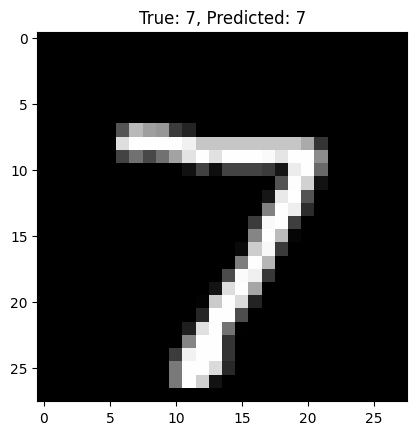

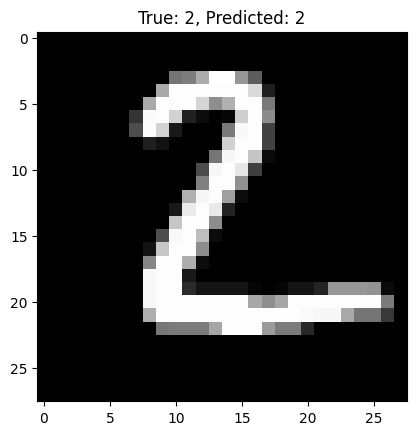

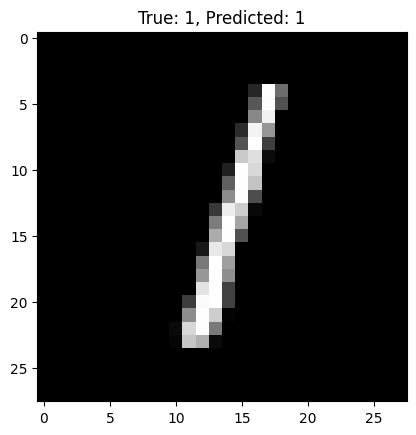

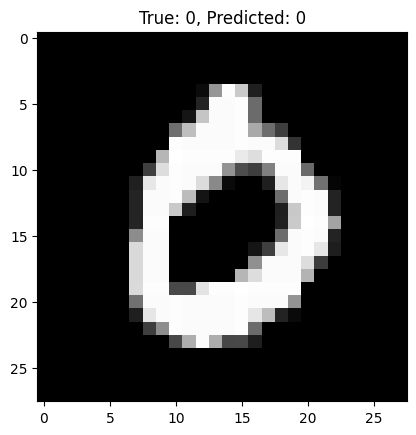

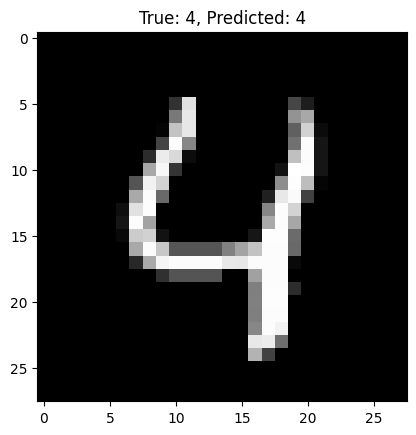

In [25]:
# Predict on a few test samples
predictions = model.predict(x_test[:5])
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test_cat[:5], axis=1)

# Display predictions
for i in range(5):
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {true_classes[i]}, Predicted: {predicted_classes[i]}")
    plt.show()

In [ ]:
missclassified_index = []
for i in range(len(y_test)):
  if int(y_hat[i] != y_test[i]):
    print(i)
    missclassified_index.append(i)